In [28]:
include("private_neal5.jl")
include("neal2.jl")

run_neal2 (generic function with 3 methods)

In [34]:
using StatsBase
using Statistics
using Distributions
using Plots

In [45]:
data = vcat(
    rand(Normal(-5.0, 1.0), 50),
    rand(Normal(0.0, 1.0), 50),
    rand(Normal(5.0, 1.0), 50)
);

hyperparams = NormHyperParams(0.0, 5.0^2, 3.0, 3.0, 1.0)
# hyperparams = NIGHyperParams(0.0, 0.1, 3.0, 3.0, 1.0)
xgrid = LinRange(-10, 10, 1000)
true_dens = (0.33 * pdf.(Normal(-5.0, 1.0), xgrid) + 
             0.33 * pdf.(Normal(0.0, 1.0), xgrid) +
             0.33 * pdf.(Normal(5.0, 1.0), xgrid));

In [46]:
state = initialize(hyperparams, length(data))

sample_full_cond(rand(Normal(-5.0, 1.0), 50), hyperparams, state)

-4.932363701863518

In [47]:
chains = run_neal2(data, hyperparams, 1000, 2000);

In [48]:
bounds = [quantile(x, [0.05, 0.95]) for x in eachcol(dens)]
mapreduce(permutedims, vcat, bounds)

1000×2 Matrix{Float64}:
 6.08655e-8  0.000217767
 6.92967e-8  0.000229945
 7.88459e-8  0.000235374
 8.96541e-8  0.000244221
 1.01678e-7  0.000254059
 1.13796e-7  0.000264539
 1.273e-7    0.000275375
 1.42343e-7  0.000282578
 1.5909e-7   0.00029449
 1.77727e-7  0.00030678
 ⋮           
 6.8416e-9   8.31964e-5
 5.95377e-9  7.97174e-5
 5.17822e-9  7.46809e-5
 4.50115e-9  6.9935e-5
 3.91041e-9  7.01665e-5
 3.39527e-9  6.81947e-5
 2.94633e-9  6.46844e-5
 2.5553e-9   6.54945e-5
 2.21492e-9  6.5805e-5

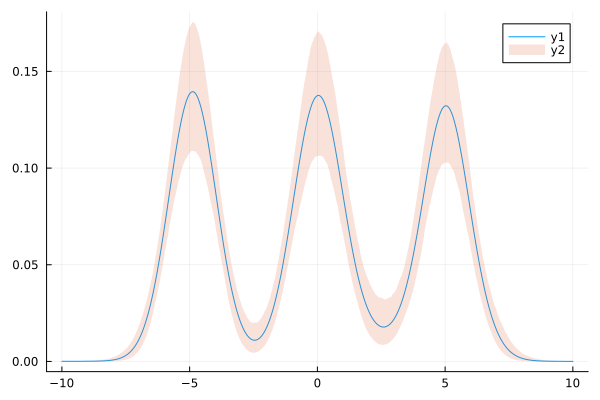

In [49]:
dens = [eval_dens_conditional(s, hyperparams, xgrid) for s in chains];
dens = mapreduce(permutedims, vcat, dens)
avg_dens = mean(dens, dims=1)
bounds = [quantile(x, [0.05, 0.95]) for x in eachcol(dens)]
bounds = mapreduce(permutedims, vcat, bounds)
plot(xgrid, avg_dens[1, :])
plot!(xgrid, bounds[:, 1], fillrange=bounds[:, 2], fillalpha=0.2, linealpha=0)

In [51]:
eps = 0.7
ndata = length(data)
public_data = data + rand(Laplace(0, eps), ndata);

In [53]:
include("private_neal5.jl")

m = 1
chains, arate = run_neal5(public_data, hyperparams, eps, 9000, 10000, m);
dens = [eval_dens(s, hyperparams, xgrid) for s in chains];
dens = mapreduce(permutedims, vcat, dens)
avg_dens = mean(dens, dims=1)

1×1000 Matrix{Float64}:
 1.11115e-6  1.14523e-6  1.18176e-6  …  0.000104126  9.92829e-5  9.46542e-5

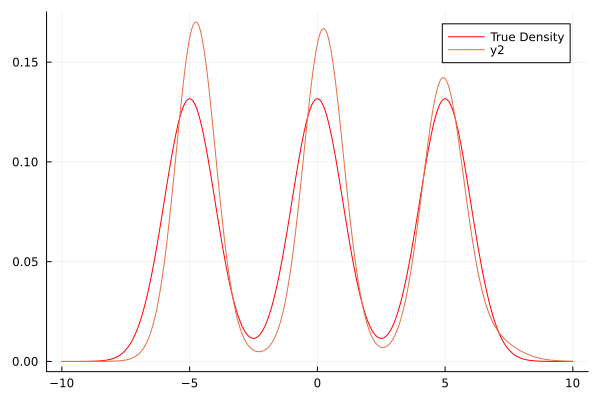

In [54]:
p = plot(xgrid, true_dens, color=:red, label="True Density")
plot!(p, xgrid, avg_dens[1, :])

In [ ]:
chains = run_neal2(data, hyperparams, 1000, 2000);
dens = [eval_dens(s, hyperparams, xgrid) for s in chains];
dens = mapreduce(permutedims, vcat, dens)
avg_dens = mean(dens, dims=1)
p = plot(xgrid, true_dens, color=:red, title="With Acceleration", label="True Density")
plot!(p, xgrid, avg_dens[1, :], color=:blue, label="Neal 2")


In [ ]:
using NNlib

In [ ]:
sum(softmax([1, 2, 3]))